<a href="https://colab.research.google.com/github/Tirna2/IML/blob/main/Assignment_1_question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Load the Iris dataset using sklearn.datasets.load iris().
# 2. Extract all four features as input and extract the class labels (0, 1, or 2).

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract features (input) and target variables (output)
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target # Target variable (class labels: 0, 1, 2)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 1. Normalization
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

model_norm = LogisticRegression()
model_norm.fit(X_train_norm, y_train)
y_pred_norm = model_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f"Accuracy (Normalization): {accuracy_norm}")


# 2. Standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model_std = LogisticRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)
print(f"Accuracy (Standardization): {accuracy_std}")


# 3. No preprocessing
model_no_prep = LogisticRegression()
model_no_prep.fit(X_train, y_train)
y_pred_no_prep = model_no_prep.predict(X_test)
accuracy_no_prep = accuracy_score(y_test, y_pred_no_prep)
print(f"Accuracy (No preprocessing): {accuracy_no_prep}")


Accuracy (Normalization): 0.9166666666666666
Accuracy (Standardization): 0.9833333333333333
Accuracy (No preprocessing): 1.0


In [ ]:
# prompt: Implement Softmax Function
# 1. Write a function that applies the softmax transformation to a set of logits.

import numpy as np

def softmax(logits):
  """Applies the softmax transformation to a set of logits.

  Args:
    logits: A NumPy array of logits.

  Returns:
    A NumPy array of probabilities.
  """
  exp_logits = np.exp(logits - np.max(logits))  # Subtract max for numerical stability
  return exp_logits / np.sum(exp_logits)


In [ ]:


import numpy as np
def categorical_cross_entropy(y_true, y_pred):
    """Computes the categorical cross-entropy loss.

    Args:
      y_true: A NumPy array of true labels (one-hot encoded).
      y_pred: A NumPy array of predicted probabilities.

    Returns:
      The categorical cross-entropy loss.
    """
    m = y_true.shape[0]
    loss = - (1 / m) * np.sum(y_true * np.log(y_pred))
    return loss

# Example usage
# Assume y_true is one-hot encoded and y_pred is from softmax
# Example values for demonstration
y_true = np.array([[1,0,0], [0,1,0], [0,0,1]])
y_pred = np.array([[0.7,0.2,0.1],[0.1,0.8,0.1],[0.2,0.3,0.5]])

loss = categorical_cross_entropy(y_true, y_pred)
print(f"Categorical Cross-Entropy Loss: {loss}")


# Convert y_train to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_onehot = np.zeros((len(y_train), num_classes))
y_train_onehot[np.arange(len(y_train)), y_train] = 1

# Example usage within the logistic regression training loop
# (assuming you have weights and bias initialized)

# ... your existing code ...

#Inside the training loop
#Calculate logits using your weights and biases
#logits = np.dot(X_train_norm, weights) + bias # Replace with your actual calculations
#probabilities = softmax(logits)
#loss = categorical_cross_entropy(y_train_onehot, probabilities)
#print("Loss: ", loss)
#... your gradient descent steps to update weights and biases ...


Categorical Cross-Entropy Loss: 0.42432189193762915


In [ ]:
# prompt: Train the Model
# 1. Implement gradient descent and stochastic gradient descent (separately) to train the model.
# 2. Track the loss during training.

import numpy as np
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Performs gradient descent to train a logistic regression model.
    """
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in range(n_iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = softmax(linear_model)
        loss = categorical_cross_entropy(y, y_predicted)
        losses.append(loss)
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias, losses


def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Performs stochastic gradient descent to train a logistic regression model.
    """
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in range(n_iterations):
        for idx, x_i in enumerate(X):
            linear_model = np.dot(x_i, weights) + bias
            y_predicted = softmax(linear_model)
            y_i = y[idx]
            loss = categorical_cross_entropy(y_i.reshape(1, -1), y_predicted.reshape(1, -1))
            losses.append(loss)

            dw = x_i * (y_predicted - y_i)
            db = y_predicted - y_i

            weights -= learning_rate * dw
            bias -= learning_rate * db
    return weights, bias, losses

# Example usage with training data:
weights_gd, bias_gd, losses_gd = gradient_descent(X_train_norm, y_train_onehot)
weights_sgd, bias_sgd, losses_sgd = stochastic_gradient_descent(X_train_norm, y_train_onehot)

print("Gradient Descent completed.")
print("Stochastic Gradient Descent completed.")

#Now you can use the trained weights and bias (weights_gd, bias_gd or weights_sgd, bias_sgd)
#to make predictions on your test data and calculate the accuracy.
#Plot the losses if needed to visualize the training process

import matplotlib.pyplot as plt
plt.plot(losses_gd, label='Gradient Descent')
plt.plot(losses_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (90,3) (90,) 

In [ ]:
import numpy as np
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Performs gradient descent to train a logistic regression model.
    """
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for _ in range(n_iterations):
        linear_model = np.dot(X, weights) + bias
        # Apply softmax to each sample's logits separately
        y_predicted = np.array([softmax(logits) for logits in linear_model])
        loss = categorical_cross_entropy(y, y_predicted)
        losses.append(loss)
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias, losses

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.94      0.79      0.86        19
           2       0.81      0.94      0.87        18

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



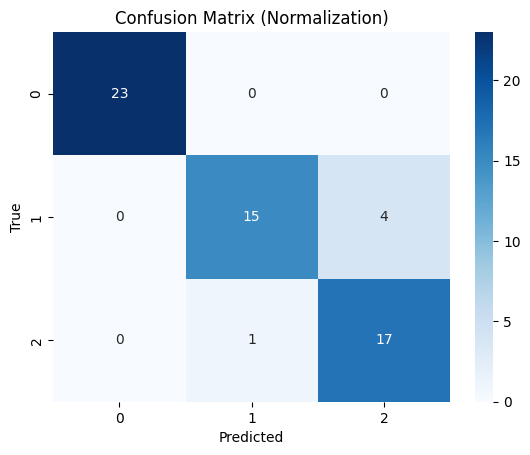

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



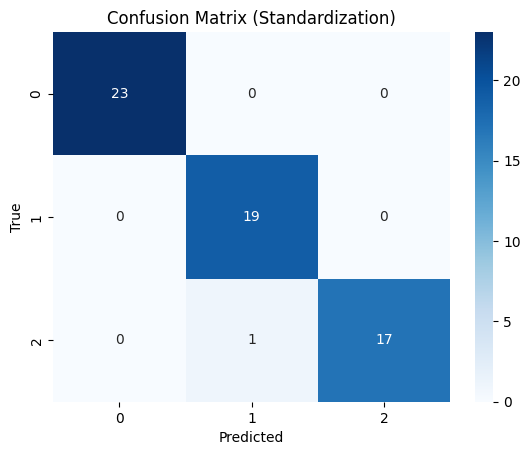

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



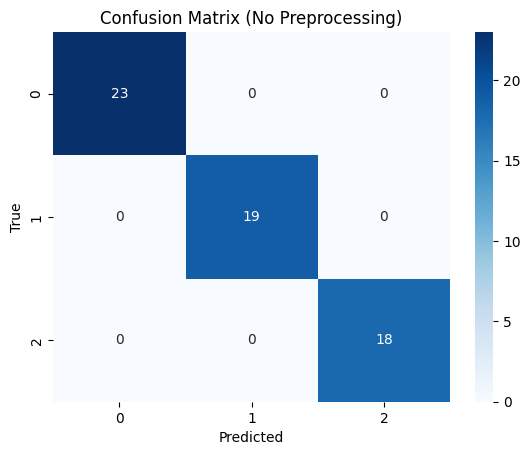

In [ ]:
# prompt: Evaluate the Model
# 1. Compute accuracy on the test set.
# 2. Generate a classification report (precision, recall, F1-score) and confusion matrix.

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model with normalization
print(classification_report(y_test, y_pred_norm))
cm_norm = confusion_matrix(y_test, y_pred_norm)
sns.heatmap(cm_norm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Normalization)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Evaluate the model with standardization
print(classification_report(y_test, y_pred_std))
cm_std = confusion_matrix(y_test, y_pred_std)
sns.heatmap(cm_std, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Standardization)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Evaluate the model with no preprocessing
print(classification_report(y_test, y_pred_no_prep))
cm_no_prep = confusion_matrix(y_test, y_pred_no_prep)
sns.heatmap(cm_no_prep, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (No Preprocessing)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


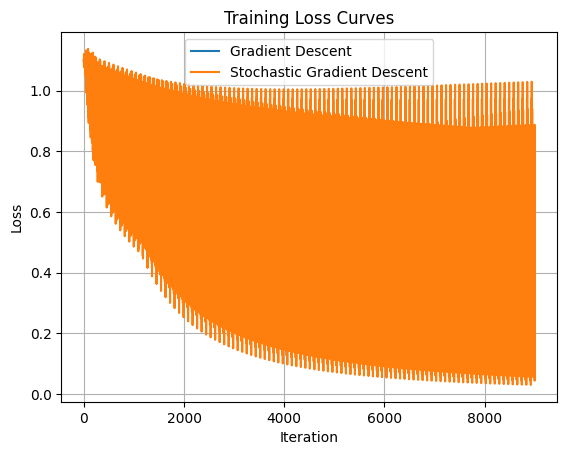

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(logits):
    """Applies the softmax transformation to a set of logits."""
    exp_logits = np.exp(logits - np.max(logits, axis=-1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

def categorical_cross_entropy(y_true, y_pred):
    """Computes the categorical cross-entropy loss."""
    m = y_true.shape[0]
    loss = - (1 / m) * np.sum(y_true * np.log(y_pred + 1e-15))  # Adding small value for numerical stability
    return loss

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """Performs gradient descent to train a logistic regression model."""
    n_samples, n_features = X.shape
    n_classes = y.shape[1]  # Get the number of classes
    weights = np.zeros((n_features, n_classes))  # Initialize weights with correct shape
    bias = np.zeros(n_classes)  # Initialize bias with correct shape
    losses = []

    for _ in range(n_iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = softmax(linear_model)
        loss = categorical_cross_entropy(y, y_predicted)
        losses.append(loss)

        errors = y_predicted - y
        dw = (1 / n_samples) * np.dot(X.T, errors)
        db = (1 / n_samples) * np.sum(errors, axis=0)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses

def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """Performs stochastic gradient descent to train a logistic regression model."""
    n_samples, n_features = X.shape
    n_classes = y.shape[1]  # Get the number of classes
    weights = np.zeros((n_features, n_classes))  # Initialize weights with correct shape
    bias = np.zeros(n_classes)  # Initialize bias with correct shape
    losses = []

    for _ in range(n_iterations):
        for idx, x_i in enumerate(X):
            linear_model = np.dot(x_i, weights) + bias
            y_predicted = softmax(linear_model)
            y_i = y[idx]  # No need to reshape y_i
            loss = categorical_cross_entropy(y_i.reshape(1, -1), y_predicted.reshape(1, -1))
            losses.append(loss)

            dw = x_i.reshape(-1, 1) * (y_predicted - y_i).reshape(1,-1)  # Reshape for broadcasting
            db = (y_predicted - y_i).reshape(1,-1) # Reshape for broadcasting

            weights -= learning_rate * dw
            bias -= learning_rate * db.flatten()

    return weights, bias, losses

# Assuming X_train_norm and y_train_onehot are already defined

# Reduce iterations for faster execution if needed
n_iterations = 100

# Call the functions to calculate losses
weights_gd, bias_gd, losses_gd = gradient_descent(X_train_norm, y_train_onehot, n_iterations=n_iterations)
weights_sgd, bias_sgd, losses_sgd = stochastic_gradient_descent(X_train_norm, y_train_onehot, n_iterations=n_iterations)

# Plotting the loss curves
plt.plot(losses_gd, label='Gradient Descent')
plt.plot(losses_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.show()